### Problem Statement :Loan Apprioval Prediction Problem
#### type:Binary classification Loan approval prediction is classic problem to learn and apply lots of data analysis techniqes to create classification model.
#### Given with the datasetconsisting of details of applicants for loan and status wheather loan application is approved or not. Basis on the binary classification model is to be created with maximum accuracy

In [2]:
### step1
### Import the packages numpy,pandas,matplotlib,sklearn,train test split,metrics

In [3]:
### step2
### Load the dataset

In [4]:
#### step3
### explore the data-shape ,visuallization

In [5]:
### step4 
### X,y---->train data test data--->Fit the model with training data predict with test data

In [10]:
### Basic and most important libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Model evaluation tools
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#### Data processing finction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv('loan_prediction.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.shape

(614, 13)

In [13]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: xlabel='Gender', ylabel='count'>

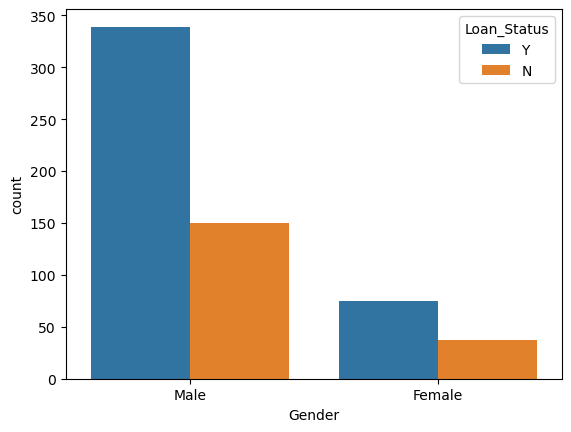

In [15]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

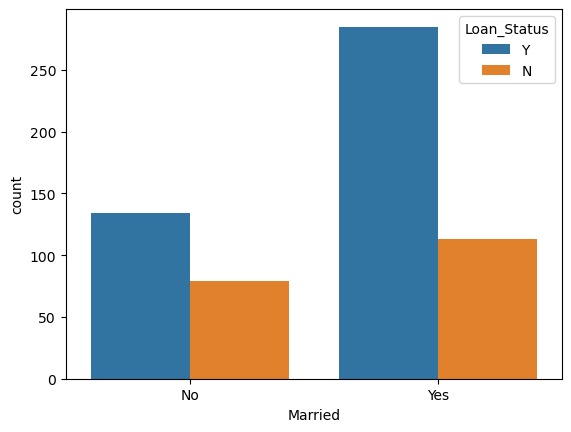

In [16]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [17]:
correletion=df.corr()

<Axes: >

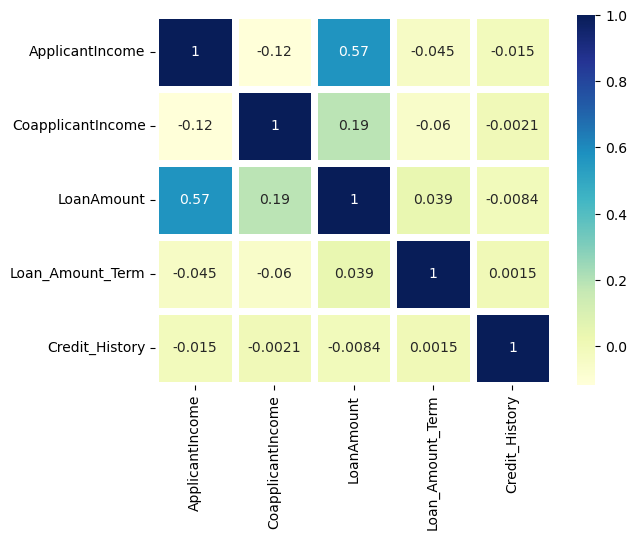

In [18]:
sns.heatmap(correletion,annot=True,linewidths=5,cmap='YlGnBu')

In [19]:
### Ther is positive corrreletion b/w applicantincome and LoanAmmount,capplicantincome and LoAmmount

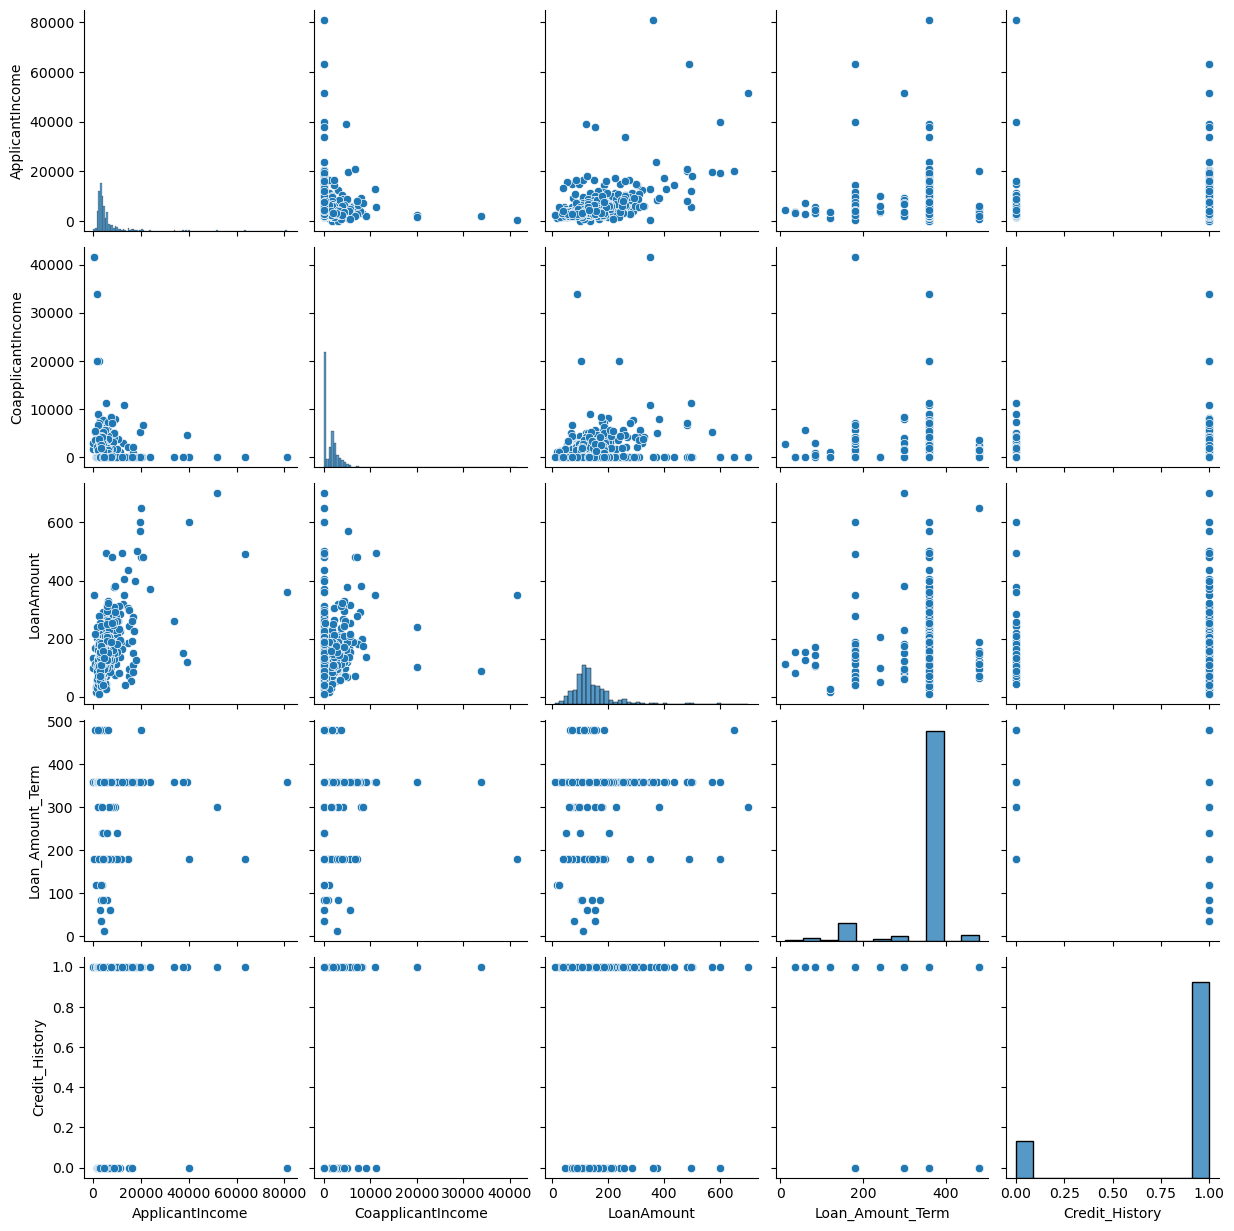

In [23]:
sns.pairplot(df)
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [27]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

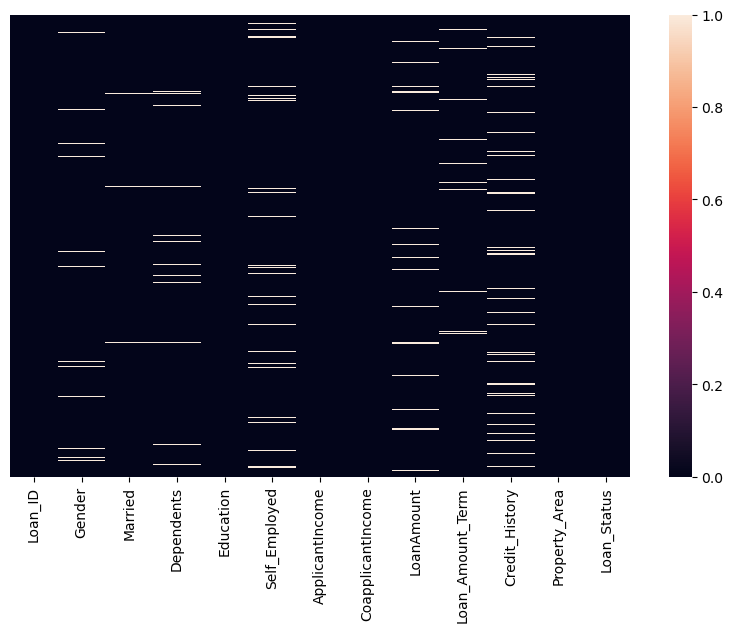

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [32]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Dependents'].value_counts())
print(df['Credit_History'].value_counts())
print(df['Loan_Amount_Term'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<Axes: >

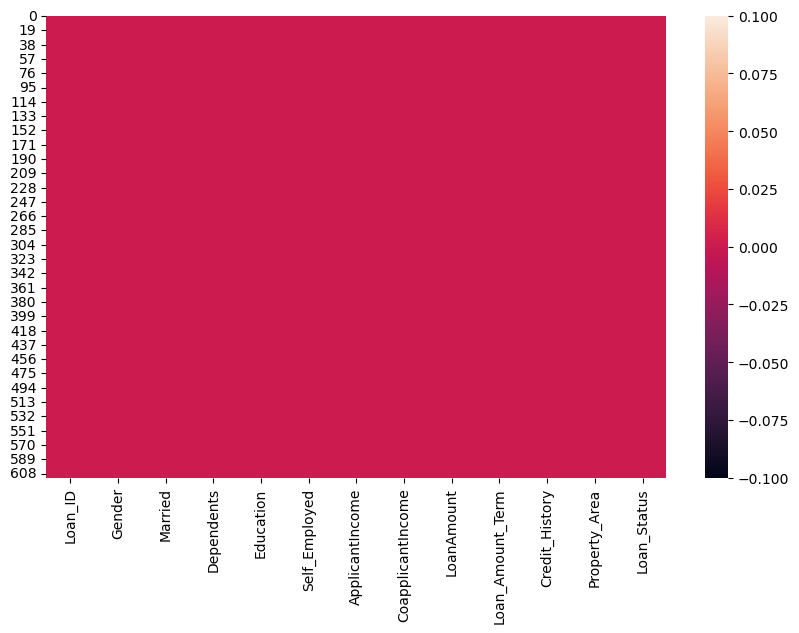

In [37]:
#Filling all Nan values with mode of respective variable
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

#All values of "Dependents" columns were of "str" form now converting to "int" form.
df["Dependents"] = df["Dependents"].replace('3+',int(3))
df["Dependents"] = df["Dependents"].replace('1',int(1))
df["Dependents"] = df["Dependents"].replace('2',int(2))
df["Dependents"] = df["Dependents"].replace('0',int(0))

df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

print(df.isnull().sum())

#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())


In [38]:
df.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

#data = pd.get_dummies(data)
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [46]:
#Dividing data into Input X variables and Target Y variable
X = df.drop(["Loan_Status","Loan_ID"],axis=1)
y = df["Loan_Status"]

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [48]:
model=LogisticRegression(solver="liblinear")

In [49]:
model.fit(X_train,y_train)


LogisticRegression(solver='liblinear')

In [50]:
LogisticRegression(solver='liblinear')


LogisticRegression(solver='liblinear')

In [51]:
model.score(X_train,y_train)


0.8018648018648019

In [52]:
model.score(X_test,y_test)


0.8324324324324325

In [53]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
DecisionTreeClassifier()


DecisionTreeClassifier()

In [55]:
dtree.score(X_train,y_train)


1.0

In [56]:
dtree.score(X_test,y_test)


0.7297297297297297

In [57]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))

0.8181818181818182


In [58]:
y_predict = dTreeR.predict(X_test)


In [59]:
print(dTreeR.score(X_test, y_test))


0.8108108108108109


In [60]:
from sklearn import metrics


<Axes: >

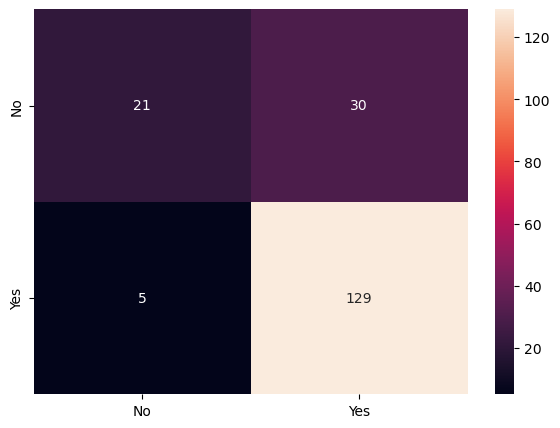

In [61]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [62]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier( n_estimators=150,base_estimator=dTreeR,random_state=0)
bgcl = bgcl.fit(X_train,y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))

0.827027027027027


<Axes: >

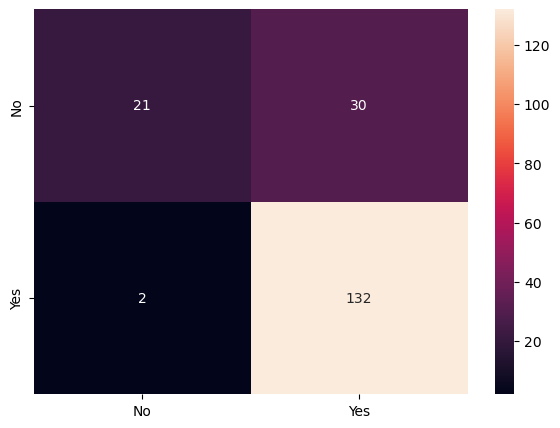

In [63]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [64]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 120,random_state=0)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test, y_test))

0.8216216216216217


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200,random_state=0)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))


0.8108108108108109


<Axes: >

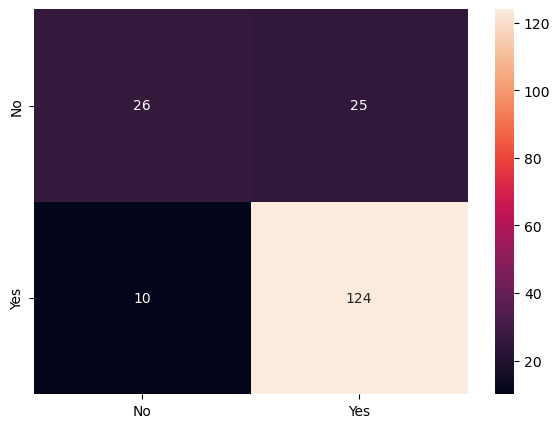

In [66]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [67]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 160, random_state=0,max_features=3)
rfcl = rfcl.fit(X_train, y_train)

0.8


<Axes: >

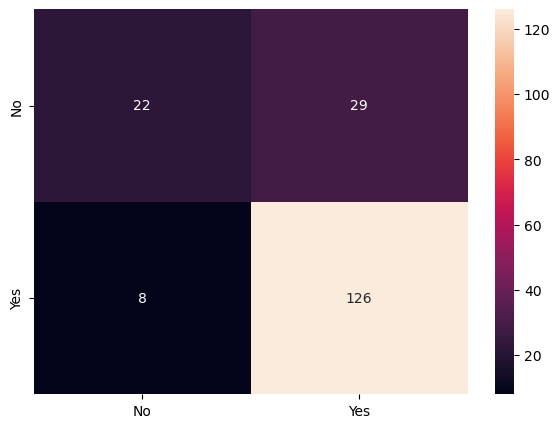

In [69]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [70]:
from scipy.stats import zscore

In [71]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-8.100650e-17,6.654105e-17,2.893089e-18,1.735854e-17,-3.761016e-17,-4.339634e-18,4.050325e-17,-2.603780e-17,5.930833e-17,-1.620130e-16,-5.786179e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-2.117107e+00,-1.372089e+00,-7.378063e-01,-5.283622e-01,-3.926007e-01,-8.606493e-01,-5.544873e-01,-1.627255e+00,-5.132498e+00,-2.428760e+00,-1.318513e+00
25%,4.723426e-01,-1.372089e+00,-7.378063e-01,-5.283622e-01,-3.926007e-01,-4.138159e-01,-5.544873e-01,-5.414462e-01,2.732313e-01,4.117327e-01,-1.318513e+00
50%,4.723426e-01,7.288155e-01,-7.378063e-01,-5.283622e-01,-3.926007e-01,-2.606393e-01,-1.480047e-01,-2.112412e-01,2.732313e-01,4.117327e-01,-4.760721e-02
75%,4.723426e-01,7.288155e-01,2.534696e-01,-5.283622e-01,-3.926007e-01,6.414426e-02,2.312023e-01,2.260572e-01,2.732313e-01,4.117327e-01,1.223298e+00
max,4.723426e-01,7.288155e-01,2.236021e+00,1.892641e+00,2.547117e+00,1.238462e+01,1.369617e+01,6.595146e+00,2.137276e+00,4.117327e-01,1.223298e+00


In [72]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' ,metric='euclidean')


In [73]:
NNH.fit(XScaled, y)


KNeighborsClassifier(metric='euclidean', weights='distance')